# CREDIT ANALYSIS
### 1. [Python & MySQL](#1)<br>
- [Library](#1a)<br>
- [Dowload K-line from binance](#1a1)<br>
- [Connect to MySQL](#1b)<br>
- [Frequency of the lowest price of the day timeframe H1 - Query](#1c)<br>
- [Frequency of the lowest price of the day in a week timeframe H1 - Query](#1d)<br>
- [Frequency of the highest price of the day timeframe H1 - Query](#1e)<br>
- [Frequency of the highest price of the day in a week timeframe H1 - Query](#1g)<br>
- [Frequency of significant price fluctuations during the day - Query](#1h)<br>
- [Frequency of significant price fluctuations during the week - Query](#1i)<br>
### 2. [Dataframe](#2)<br>
- [( DF ) Full dataframe](#2a)<br>
- [(DF1) Frequency of the lowest price of the day timeframe H1 - Dataframe](#2b)<br>
- [(DF2) Frequency of the lowest price of the day in a week timeframe H1 - Dataframe](#2c)<br>
- [(DF3) Frequency of the highest price of the day timeframe H1 - Dataframe](#2d)<br>
- [(DF4) Frequency of the highest price of the day in a week timeframe H1 - Dataframe](#2e)<br>
- [(DF5) Frequency of significant price fluctuations during the day - Dataframe](#2g)<br>
- [(DF6) Frequency of significant price fluctuations during the week - Dataframe](#2h)<br>
### 3. [Information,visualization](#3) <br>
- [( DF ) Dataframe information](#3a1)<br>
- [Frequency of the lowest price of the day timeframe H1](#3a)<br>
- [Frequency of the lowest price of the day in a week timeframe H1](#3b)<br>
- [Frequency of the highest price of the day timeframe H1](#3c)<br>
- [Frequency of the highest price of the day in a week timeframe H1](#3d)<br>
- [Frequency of significant price fluctuations during the day](#3e)<br>
- [Frequency of significant price fluctuations during the week](#3g)<br>
### 4. [Conclusion](#4) <br>

### 1. Python & MySQL : <a id="1"></a>


* #### Library : <a id="1a"></a>

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector 
import random
sns.set_style("dark")

In [4]:
def full_data():
    sql_query = """ SELECT * FROM credit """
    return sql_query

In [5]:
def get_database_from_MySQL_after_query(host, user, password, database, sql_query):
    # Thông tin kết nối
    config = {
        "host": host,    # Địa chỉ máy chủ MySQL
        "user": user,         # Tên người dùng MySQL
        "password": password, # Mật khẩu MySQL
        "database": database       # Tên cơ sở dữ liệu
    }

    # Kết nối tới MySQL
    conn = mysql.connector.connect(**config)

    # Tạo một đối tượng cursor
    cursor = conn.cursor()

    # Thực hiện truy vấn SQL
    cursor.execute(sql_query)

    # Trích xuất kết quả
    results = cursor.fetchall()

    # Trích xuất tên cột từ đối tượng cursor
    column_names = [i[0] for i in cursor.description]

    # Đóng kết nối
    conn.close()

    # Tạo DataFrame với tên cột
    df = pd.DataFrame(results, columns=column_names)
    
    return df

In [6]:
df = get_database_from_MySQL_after_query("localhost","root","Khanhbg2522003","credit",full_data())
df


,CLIENT_ID,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,12691
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,8256
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,3418
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3313
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,4716
...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,$40K - $60K,Blue,40,4003
10123,710638233,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4277
10124,716506083,44,F,1,High School,Married,Less than $40K,Blue,36,5409
10125,717406983,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,5281


In [7]:
CLIENT_ID = "CLIENT_ID"

Customer_Age = "Customer_Age"

Gender = "Gender"

Dependent_count = "Dependent_count"

Education_Level = "Education_Level"

Marital_Status = "Marital_Status"

Income_Category = "Income_Category"

Card_Category = "Card_Category"

Months_on_book = "Months_on_book"

Credit_Limit  = "Credit_Limit"


CLIENT_ID: Đây có thể là một số duy nhất đại diện cho mỗi khách hàng hoặc một loại mã định danh cá nhân.

Customer_Age: Tuổi của khách hàng.

Gender: Giới tính của khách hàng (M cho nam và F cho nữ).

Dependent_count: Số lượng người phụ thuộc của khách hàng.

Education_Level: Trình độ học vấn của khách hàng.

Marital_Status: Tình trạng hôn nhân của khách hàng.

Income_Category: Mức thu nhập hàng năm của khách hàng.

Card_Category: Loại thẻ tín dụng sử dụng bởi khách hàng (ví dụ: Blue).

Months_on_book: Số tháng mà khách hàng đã sử dụng dịch vụ ngân hàng.

Credit_Limit: Hạn mức tín dụng của khách hàng.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLIENT_ID        10127 non-null  int64 
 1   Customer_Age     10127 non-null  int64 
 2   Gender           10127 non-null  object
 3   Dependent_count  10127 non-null  int64 
 4   Education_Level  10127 non-null  object
 5   Marital_Status   10127 non-null  object
 6   Income_Category  10127 non-null  object
 7   Card_Category    10127 non-null  object
 8   Months_on_book   10127 non-null  int64 
 9   Credit_Limit     10127 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 791.3+ KB


In [9]:
df.describe()

,CLIENT_ID,Customer_Age,Dependent_count,Months_on_book,Credit_Limit
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,8631.938679
std,3.690378e+07,8.016814,1.298908,7.986416,9088.788539
min,7.080821e+08,26.000000,0.000000,13.000000,1438.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,2555.000000
50%,7.179264e+08,46.000000,2.000000,36.000000,4549.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,11067.500000
max,8.283431e+08,73.000000,5.000000,56.000000,34516.000000


Biểu đồ phân phối tuổi của khách hàng: tạo biểu đồ để hiểu phân phối tuổi của khách hàng trong dataset.

Phân phối giới tính của khách hàng: xác định tỷ lệ nam và nữ trong dataset.

Phân phối thu nhập hàng năm (Income_Category) của khách hàng.

Biểu đồ thể hiện sự phân chia giữa các loại thẻ (Card_Category) sử dụng bởi khách hàng.

Phân phối hạn mức tín dụng (Credit_Limit) của khách hàng.

Có mối tương quan nào giữa tuổi của khách hàng và hạn mức tín dụng theo độ tuổi không?

Có mối tương quan giữa trình độ học vấn và thu nhập hàng năm của khách hàng theo độ tuổi không?

Có mối tương quan giữa số tháng sử dụng dịch vụ và hạn mức tín dụng theo độ tuổi không?

Có mối tương quan nào giữa thu nhập hàng năm và hạn mức tín dụng theo độ tuổi không?

In [36]:
df1 = df.groupby("Customer_Age")["CLIENT_ID"].count().sort_index().reset_index()

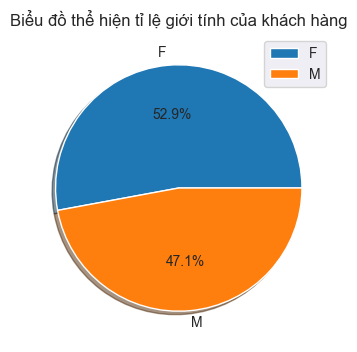

In [13]:
df2 = df.groupby("Gender")["CLIENT_ID"].count()
plt.figure(figsize=(14,4))
plt.pie(df2.values,labels=df2.index,autopct='%1.1f%%',shadow=True)
plt.title("Biểu đồ thể hiện tỉ lệ giới tính của khách hàng")
plt.xticks()
plt.legend()
plt.show()



In [37]:
df3 = df.groupby(Education_Level)[CLIENT_ID].count().sort_values(ascending=False)

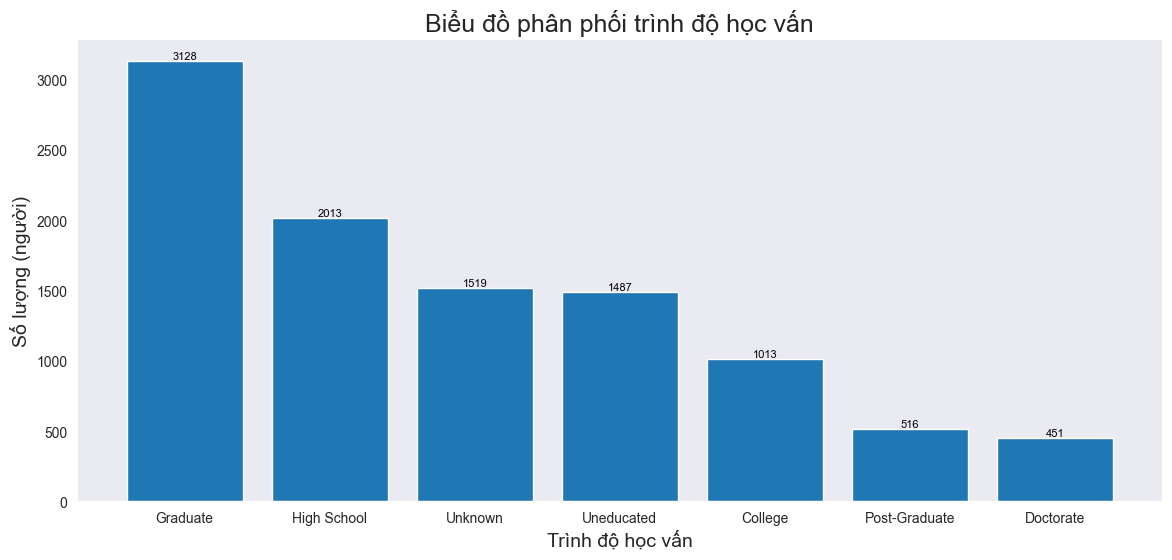

In [15]:
plt.figure(figsize=(14,6))
bars = plt.bar(df3.index,df3.values)
plt.title("Biểu đồ phân phối trình độ học vấn",fontsize=18)
plt.xlabel("Trình độ học vấn",fontsize=14)
plt.ylabel("Số lượng (người)",fontsize=14)
for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8, color='black')
plt.show()


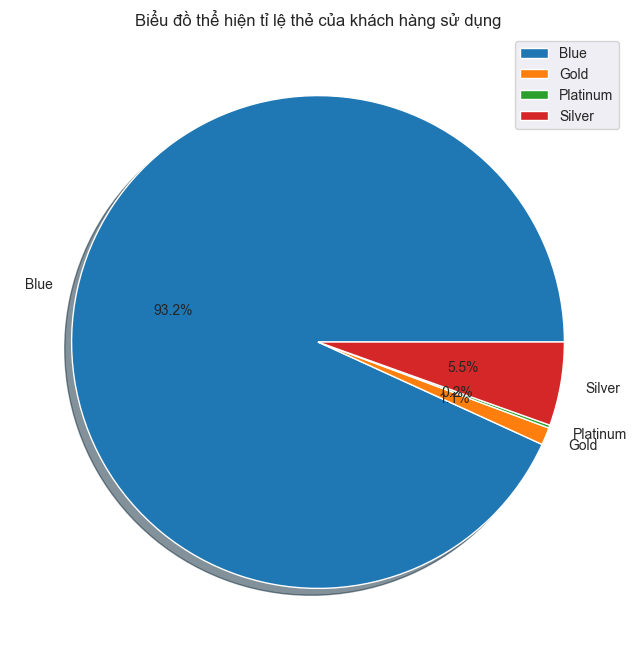

In [41]:
df4 = df.groupby(Card_Category)["CLIENT_ID"].count()
plt.figure(figsize=(14,8))
plt.pie(df4.values,labels=df4.index,autopct='%1.1f%%',shadow=True)
plt.title("Biểu đồ thể hiện tỉ lệ thẻ của khách hàng sử dụng")
plt.xticks()
plt.legend()
plt.show()

In [42]:
df5 = df.groupby(Income_Category)["CLIENT_ID"].count().sort_values(ascending=False)


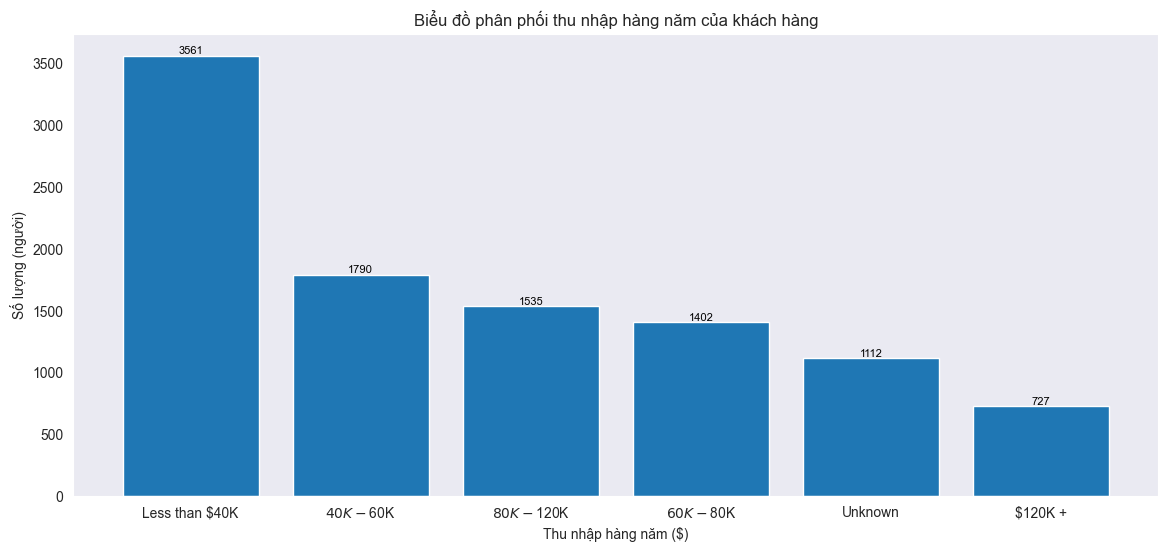

In [43]:
plt.figure(figsize=(14,6))
bars = plt.bar(df5.index,df5.values)
plt.title("Biểu đồ phân phối thu nhập hàng năm của khách hàng")
plt.ylabel("Số lượng (người)")
plt.xlabel("Thu nhập hàng năm ($)")
for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8, color='black')
plt.show()


In [44]:
df6 = df.groupby(Credit_Limit)[CLIENT_ID].count().reset_index()
df6["Credit_Limit"] = (df6['Credit_Limit'] / 1000).astype(int)
df6 = df6.groupby(Credit_Limit)[CLIENT_ID].sum()


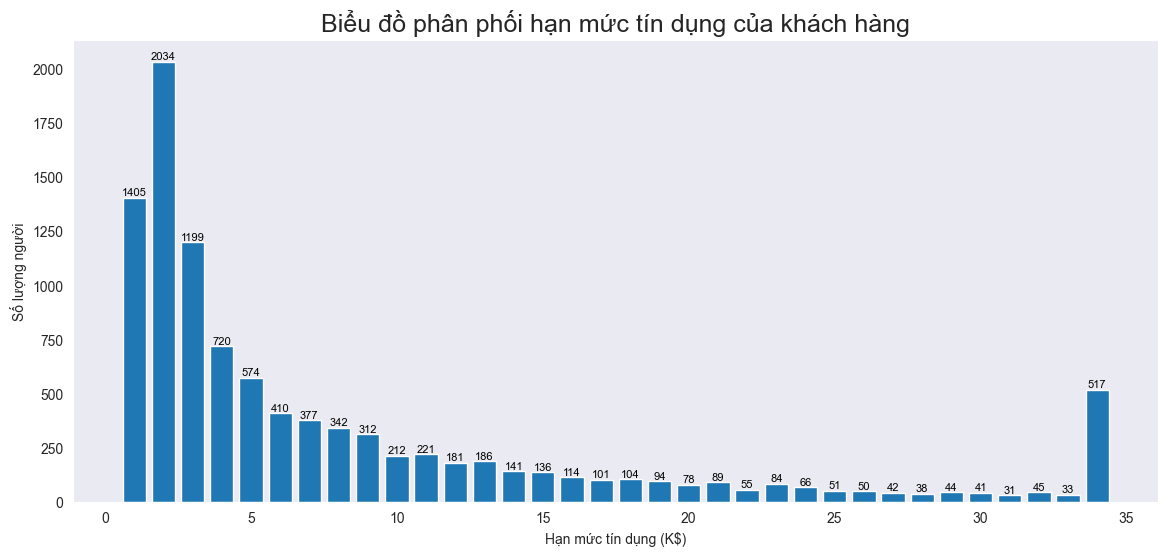

In [45]:
plt.figure(figsize=(14,6))
bars = plt.bar(df6.index,df6.values)
plt.title("Biểu đồ phân phối hạn mức tín dụng của khách hàng",fontsize =18)
plt.xlabel("Hạn mức tín dụng (K$)")
plt.ylabel("Số lượng người")
for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8, color='black')
plt.show()


In [64]:
df3a = df.drop(df[(df["Income_Category"] == "Unknown") | (df["Education_Level"] == "Unknown")].index)
for i in df3a.index:
    if df3a["Income_Category"].loc[i] == "Less than $40K":
        df3a.at[i, "Income_Category"] = random.randint(0, 40000)
    elif df3a["Income_Category"].loc[i] == "$40K - $60K":
        df3a.at[i, "Income_Category"] = random.randint(40000, 60000)
    elif df3a["Income_Category"].loc[i] == "$60K - $80K":
        df3a.at[i, "Income_Category"] = random.randint(60000, 80000)
    elif df3a["Income_Category"].loc[i] == "$80K - $120K":
        df3a.at[i, "Income_Category"] = random.randint(80000, 120000)
    elif df3a["Income_Category"].loc[i] == "$120K +":
        df3a.at[i, "Income_Category"] = random.randint(120000, 1000000)

df3a

,CLIENT_ID,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit
0,768805383,45,M,3,High School,Married,61600,Blue,39,12691
1,818770008,49,F,5,Graduate,Single,16224,Blue,44,8256
2,713982108,51,M,3,Graduate,Married,100648,Blue,36,3418
3,769911858,40,F,4,High School,Unknown,7361,Blue,34,3313
4,709106358,40,M,3,Uneducated,Married,67800,Blue,21,4716
...,...,...,...,...,...,...,...,...,...,...
10121,713899383,56,F,1,Graduate,Single,32351,Blue,50,3688
10122,772366833,50,M,2,Graduate,Single,44502,Blue,40,4003
10124,716506083,44,F,1,High School,Married,32267,Blue,36,5409
10125,717406983,30,M,2,Graduate,Unknown,54763,Blue,36,5281


In [65]:
df3b = df3a.groupby(Education_Level)[Income_Category].mean()

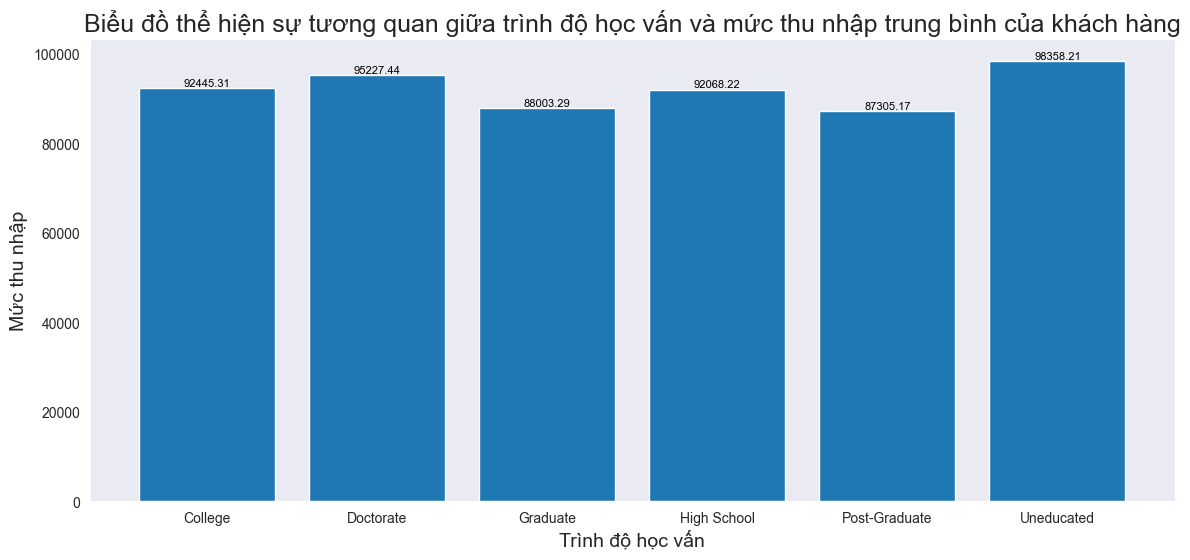

In [60]:
plt.figure(figsize=(14,6))
bars = plt.bar(df3a.index,df3a.values)
plt.title("Biểu đồ thể hiện sự tương quan giữa trình độ học vấn và mức thu nhập trung bình của khách hàng",fontsize =18)
plt.xlabel("Trình độ học vấn",fontsize=14)
plt.ylabel("Mức thu nhập",fontsize=14)
for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8, color='black')
plt.show()

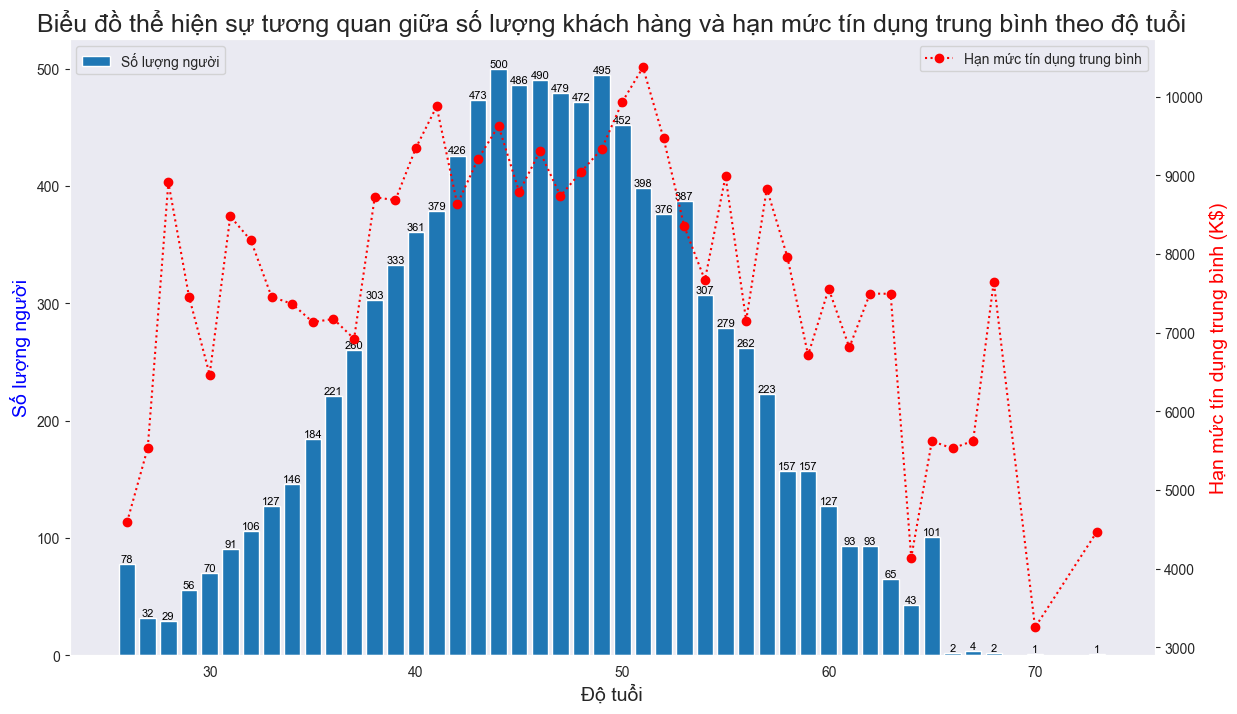

In [83]:
df7 = df.groupby(Customer_Age)[Credit_Limit].mean()
fig, ax1 = plt.subplots(figsize=(14,8 ))
bars = ax1.bar(df1["Customer_Age"], df1["CLIENT_ID"], label="Số lượng người")
ax1.set_title("Biểu đồ thể hiện sự tương quan giữa số lượng khách hàng và hạn mức tín dụng trung bình theo độ tuổi", fontsize=18)
ax1.set_xlabel("Độ tuổi",fontsize=14)
ax1.set_ylabel("Số lượng người", color="blue",fontsize=14)
plt.legend()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8, color='black')

ax2 = ax1.twinx()

# Vẽ biểu đồ hạn mức tín dụng
ax2.plot(df7.index, df7.values, color="red", label="Hạn mức tín dụng trung bình", linestyle="dotted", marker="o")
ax2.set_ylabel("Hạn mức tín dụng trung bình (K$)", color="red",fontsize=14)

# Hiển thị chú thích (legend) cho cả hai trục
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

* Hạn mức tin dụng trung bình của khách hàng với phân khúc từ 25 đến 30 tuổi khá cao mặc dù số lượng còn thấp.
* Hạn mức tín dụng trung bình của khách hàng với phân khúc từ 60 đến 70  tuổi 
* Hạn mức tín dụng trung bình của khách hàng với phân khúc từ 30 đến 40 tuổi có xu hướng giảm dần vì trong khoảng thời gian đó họ đi làm với mức thu nhập cao nên có thể hạn chế việc sử dụng thẻ tín dụng điều này cũng có thể làm cho hạn mức tín dụng bị giảm xuống.

In [84]:
df8 = df3a.groupby(Customer_Age)[Income_Category].mean()
df8

Customer_Age
26         37084.06
27     40091.916667
28     20259.333333
29     53685.363636
30         49043.18
31     38549.939394
32     60242.346154
33     90766.191919
34    107135.451327
35     73699.359712
36     99578.988024
37     82808.604762
38     69300.781116
39     85184.869565
40     83475.583333
41     90238.272425
42     64141.334347
43     91429.719346
44     84431.240437
45     83609.258065
46    101042.854839
47     82621.135838
48     75802.563218
49     96872.513889
50    118714.325373
51    127465.383275
52    131331.034364
53    135577.482085
54     99141.280702
55    132323.116279
56    131626.557214
57    116034.170455
58     114840.82906
59     65370.239669
60     46947.258065
61     62423.175676
62     55212.477612
63     48883.869565
64       25865.9375
65     29193.469697
66          38664.0
67          36447.0
68          26289.0
70          32900.0
73          41895.0
Name: Income_Category, dtype: object

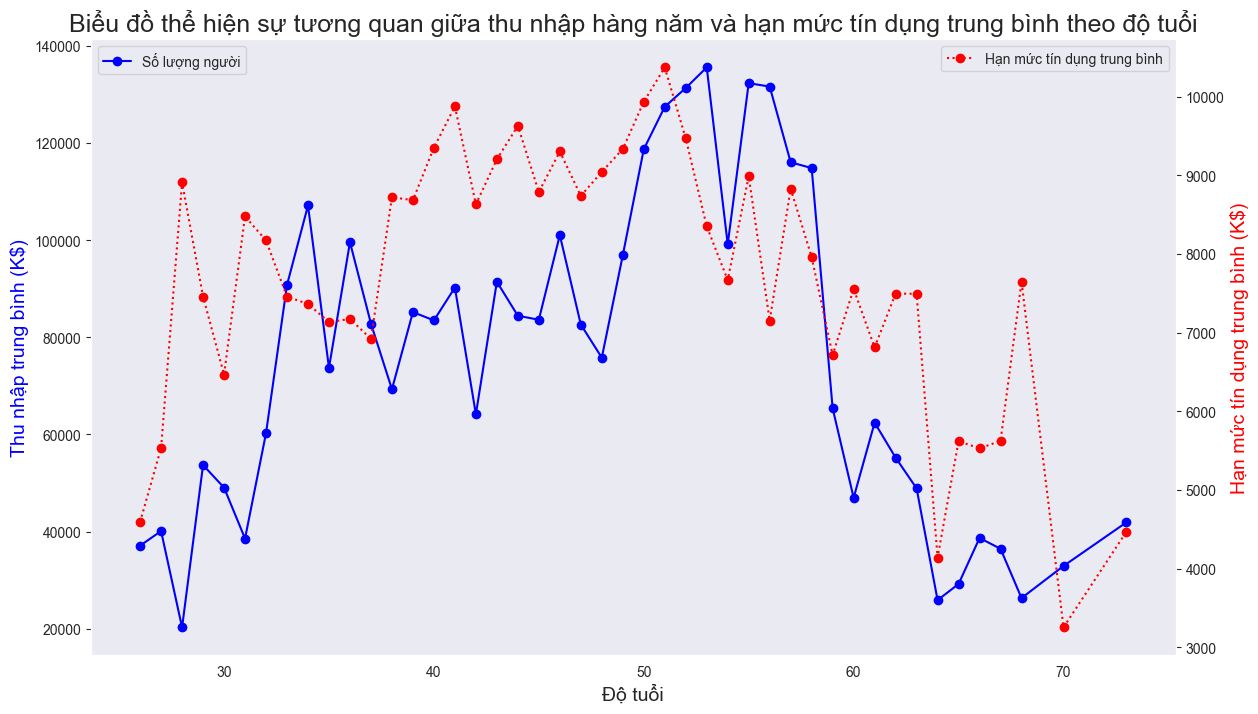

In [90]:
fig, ax1 = plt.subplots(figsize=(14,8 ))
ax1.plot(df8.index, df8.values, label="Số lượng người",color="blue",marker="o")
ax1.set_title("Biểu đồ thể hiện sự tương quan giữa thu nhập hàng năm và hạn mức tín dụng trung bình theo độ tuổi", fontsize=18)
ax1.set_xlabel("Độ tuổi",fontsize=14)
ax1.set_ylabel("Thu nhập trung bình (K$)", color="blue",fontsize=14)
plt.legend()
ax2 = ax1.twinx()
# Vẽ biểu đồ hạn mức tín dụng
ax2.plot(df7.index, df7.values, color="red", label="Hạn mức tín dụng trung bình",linestyle="dotted", marker="o")
ax2.set_ylabel("Hạn mức tín dụng trung bình (K$)", color="red",fontsize=14)

# Hiển thị chú thích (legend) cho cả hai trục
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [92]:
df10 = df.groupby(Customer_Age)[Months_on_book].mean()

Customer_Age
26    19.576923
27    21.843750
28    22.724138
29    23.660714
30    22.957143
31    24.406593
32    25.358491
33    25.078740
34    26.130137
35    27.146739
36    28.095023
37    28.492308
38    29.066007
39    30.438438
40    30.515235
41    31.554090
42    32.610329
43    32.995772
44    34.040000
45    35.135802
46    35.683673
47    36.534447
48    37.366525
49    38.062626
50    38.630531
51    39.293970
52    40.715426
53    41.134367
54    42.114007
55    41.860215
56    43.221374
57    44.103139
58    45.592357
59    46.229299
60    47.118110
61    48.677419
62    48.408602
63    48.984615
64    50.232558
65    50.871287
66    55.000000
67    54.250000
68    54.000000
70    56.000000
73    36.000000
Name: Months_on_book, dtype: float64

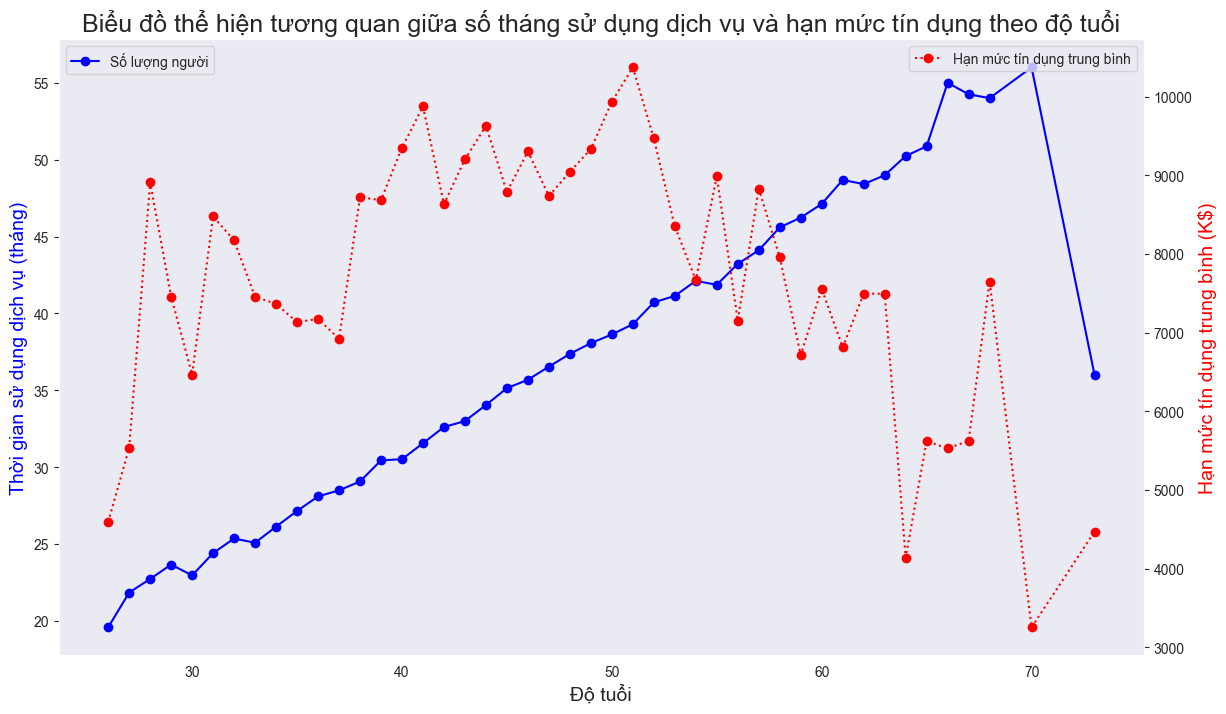

In [98]:
fig, ax1 = plt.subplots(figsize=(14,8 ))
ax1.plot(df10.index, df10.values, label="Số lượng người",color="blue",marker="o")
ax1.set_title("Biểu đồ thể hiện tương quan giữa số tháng sử dụng dịch vụ và hạn mức tín dụng theo độ tuổi", fontsize=18)
ax1.set_xlabel("Độ tuổi",fontsize=14)
ax1.set_ylabel("Thời gian sử dụng dịch vụ (tháng)", color="blue",fontsize=14)
plt.legend()
ax2 = ax1.twinx()
# Vẽ biểu đồ hạn mức tín dụng
ax2.plot(df7.index, df7.values, color="red", label="Hạn mức tín dụng trung bình",linestyle="dotted", marker="o")
ax2.set_ylabel("Hạn mức tín dụng trung bình (K$)", color="red",fontsize=14)

# Hiển thị chú thích (legend) cho cả hai trục
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')